In [353]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import math

In [354]:
# Load the test data
test_df_orig = pd.read_parquet(f"data/test_data.parquet")
test_pred_cols = list(
    filter(
        lambda x: x.startswith("call") or x.startswith("put"),
        test_df_orig.columns.tolist(),
    )
)
output_matching = pd.read_csv(f"matching/output_smooth.csv", header=None)
output_matching.columns = test_pred_cols
test_df = test_df_orig.copy()
test_df[test_pred_cols] = output_matching
print(test_df.shape)
print(list(test_df.columns))

test_df.head()

(12065, 96)
['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400', 'put_iv_25500', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,24735.9,0.280939,0.250310,0.256569,0.251509,0.242149,0.239826,0.232439,0.227128,...,0.006587,0.002826,-1.737617e+05,-0.009541,-0.017831,0.000264,2.032521e+06,1.000000e-06,-0.077238,-5.362742e+06
1,1,24766.7,0.270276,0.272136,0.258893,0.250132,0.243810,0.239684,0.233548,0.228239,...,0.005777,0.004588,-3.195086e+05,-0.024106,-0.004696,-0.000158,-4.529075e+06,-1.619022e+06,-0.956928,4.624907e+06
2,2,24896.9,0.256311,0.251731,0.235451,0.224953,0.214869,0.204580,0.194604,0.187288,...,0.000829,-0.034944,1.027525e+06,0.028201,0.032234,0.007687,2.663908e+06,0.000000e+00,-0.116264,-2.669766e+06
3,3,24898.1,0.241888,0.232762,0.220505,0.209550,0.198602,0.186190,0.173789,0.166457,...,-0.009323,-0.022969,-4.720074e+06,-0.001513,0.008704,-0.000206,-7.672936e+06,-1.903406e+06,-2.249208,-1.858254e+07
4,4,24906.5,0.235328,0.230199,0.222983,0.214126,0.206842,0.199081,0.192603,0.187101,...,-0.018674,-0.007588,-4.051681e+05,-0.136267,0.002425,-0.002200,1.334469e+06,2.548789e+05,1.999104,3.024212e+06


In [355]:
test_df.isna().sum().sum()

1

In [356]:
# Find rows in test_df that contain NaN values
nan_rows = test_df[test_df.isna().any(axis=1)]

nan_rows[test_pred_cols[20:30]]

,call_iv_26000,call_iv_26100,call_iv_26200,call_iv_26300,call_iv_26400,call_iv_26500,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300
588,0.282231,0.295503,0.310477,0.327917,0.34108,0.357487,0.379096,0.361297,0.343712,0.329295


In [357]:
test_df.fillna(0.43, inplace=True)

In [358]:
test_df.isna().sum().sum()

0

In [359]:
sample_submission = pd.read_csv(f"data/sample_submission.csv")
submission_cols = sample_submission.columns.tolist()
sub = test_df[submission_cols].copy()
sub.to_csv("final_day/output/please.csv", index=False)
sub

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.250310,0.256569,0.251509,0.242149,0.239826,0.232439,0.227128,0.222997,...,0.232334,0.226005,0.222937,0.227301,0.234169,0.245671,0.250422,0.259548,0.274226,0.282229
1,1,0.270276,0.272136,0.258893,0.250132,0.243810,0.239684,0.233548,0.228239,0.225751,...,0.234276,0.228209,0.225580,0.230905,0.238673,0.249402,0.258352,0.264555,0.273179,0.281367
2,2,0.256311,0.251731,0.235451,0.224953,0.214869,0.204580,0.194604,0.187288,0.182759,...,0.194612,0.188052,0.183025,0.181115,0.181346,0.185434,0.190750,0.196949,0.204845,0.211405
3,3,0.241888,0.232762,0.220505,0.209550,0.198602,0.186190,0.173789,0.166457,0.160899,...,0.173325,0.166394,0.161561,0.159978,0.164384,0.172032,0.186287,0.193982,0.196568,0.206107
4,4,0.235328,0.230199,0.222983,0.214126,0.206842,0.199081,0.192603,0.187101,0.182540,...,0.193152,0.186880,0.182283,0.177920,0.176293,0.176000,0.177743,0.179256,0.182314,0.186292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.243574,0.233427,0.225079,0.215693,0.207052,0.199590,0.192488,0.186856,0.181462,...,0.192817,0.186377,0.181421,0.177270,0.175222,0.174754,0.176356,0.177716,0.178742,0.181826
12061,12061,0.240958,0.236380,0.226972,0.217036,0.209518,0.200906,0.193655,0.187692,0.183594,...,0.193841,0.187394,0.183401,0.180196,0.177969,0.177923,0.178745,0.180254,0.181694,0.183994
12062,12062,0.256475,0.243817,0.234267,0.221270,0.211873,0.201654,0.192601,0.185088,0.179760,...,0.192306,0.184818,0.179666,0.176916,0.177109,0.180707,0.186710,0.193074,0.201360,0.209940
12063,12063,0.250257,0.239825,0.231658,0.222417,0.211320,0.205129,0.197849,0.190833,0.185851,...,0.197971,0.190933,0.186172,0.182287,0.178660,0.177957,0.178552,0.178806,0.180169,0.182406


[0.237029, 0.238036, 0.219707, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.171676, 0.173145, nan, nan, nan, nan, nan, 0.205389, nan, 0.221273, nan, nan, nan, nan]
[0.237029, 0.238036, 0.219707, 0.215741, 0.203225, 0.195697, 0.187394, 0.180971, 0.176132, 0.17113, 0.16914, 0.169749, 0.171676, 0.173145, 0.176059, 0.181736, 0.18624, 0.192019, 0.198409, 0.205389, 0.214226, 0.221273, 0.231097, 0.243492, 0.256527, 0.270163]


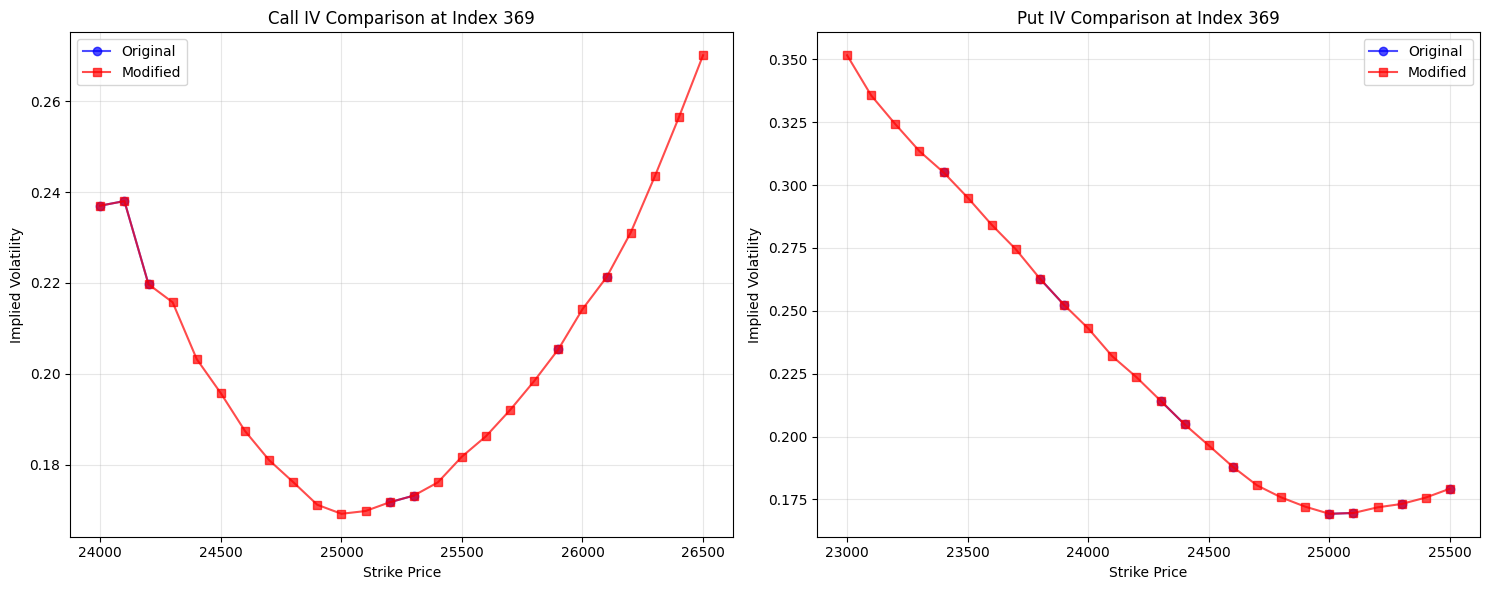

In [360]:
# Load the original test data
test_df_original = pd.read_parquet(f"data/test_data.parquet")

# Select a specific index for comparison
index_to_plot = 369

# Get call and put columns from both dataframes
call_cols_orig = [col for col in test_df_original.columns if col.startswith("call_iv_")]
put_cols_orig = [col for col in test_df_original.columns if col.startswith("put_iv_")]

call_cols_modified = [col for col in test_df.columns if col.startswith("call_iv_")]
put_cols_modified = [col for col in test_df.columns if col.startswith("put_iv_")]

# Extract strike prices
call_strikes = [int(col.split("_")[-1]) for col in call_cols_orig]
put_strikes = [int(col.split("_")[-1]) for col in put_cols_orig]

# Get data for the specific index
call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

call_values_modified = [test_df[col].iloc[index_to_plot] for col in call_cols_modified]
put_values_modified = [test_df[col].iloc[index_to_plot] for col in put_cols_modified]

# Create comparison plots
plt.figure(figsize=(15, 6))

# Plot call options comparison
plt.subplot(1, 2, 1)
plt.plot(
    call_strikes, call_values_orig, "o-", color="blue", label="Original", alpha=0.7
)
plt.plot(
    call_strikes, call_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
print(call_values_orig)
print(call_values_modified)
plt.title(f"Call IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot put options comparison
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_values_orig, "o-", color="blue", label="Original", alpha=0.7)
plt.plot(
    put_strikes, put_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
plt.title(f"Put IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [361]:
def smoothPCA(data, n_components=2):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=n_components)
    test_df_2_raw = pca.inverse_transform(pca.fit_transform(data[test_pred_cols]))
    test_df_2 = data.copy()
    test_df_2[test_pred_cols] = test_df_2_raw
    # For each call and put column, replace values in test_df_2 with non-NaN values from test_df_original
    for col in test_pred_cols:
        if col in test_df_orig.columns:
            # Get mask of non-NaN values in original data
            non_nan_mask = ~test_df_orig[col].isna()
            # # Replace corresponding values in test_df_2
            test_df_2.loc[non_nan_mask, col] = test_df_orig.loc[non_nan_mask, col]

    return test_df_2

In [362]:
test_df_orig.isna().sum().sum()

376504

In [363]:
test_df_3 = smoothPCA(test_df, n_components=5)
test_df_3 = smoothPCA(test_df_3, n_components=5)
test_df_3 = smoothPCA(test_df_3, n_components=5)

[nan, nan, 0.230511, 0.214605, 0.208487, nan, nan, 0.18649, 0.181747, nan, nan, 0.175455, nan, nan, 0.180396, nan, nan, 0.193911, 0.199638, 0.205881, nan, 0.219397, nan, nan, 0.250993, nan]
[0.24267118565201862, 0.23701995105629878, 0.230511, 0.214605, 0.208487, 0.20034200518627715, 0.19280807388497453, 0.18649, 0.181747, 0.17795480792173624, 0.17539713677043872, 0.175455, 0.17685635213518144, 0.17813979401262084, 0.180396, 0.18510693913077997, 0.1891625731244253, 0.193911, 0.199638, 0.205881, 0.21309343954969337, 0.219397, 0.22839449950750967, 0.23913217504262418, 0.250993, 0.2645324952856478]


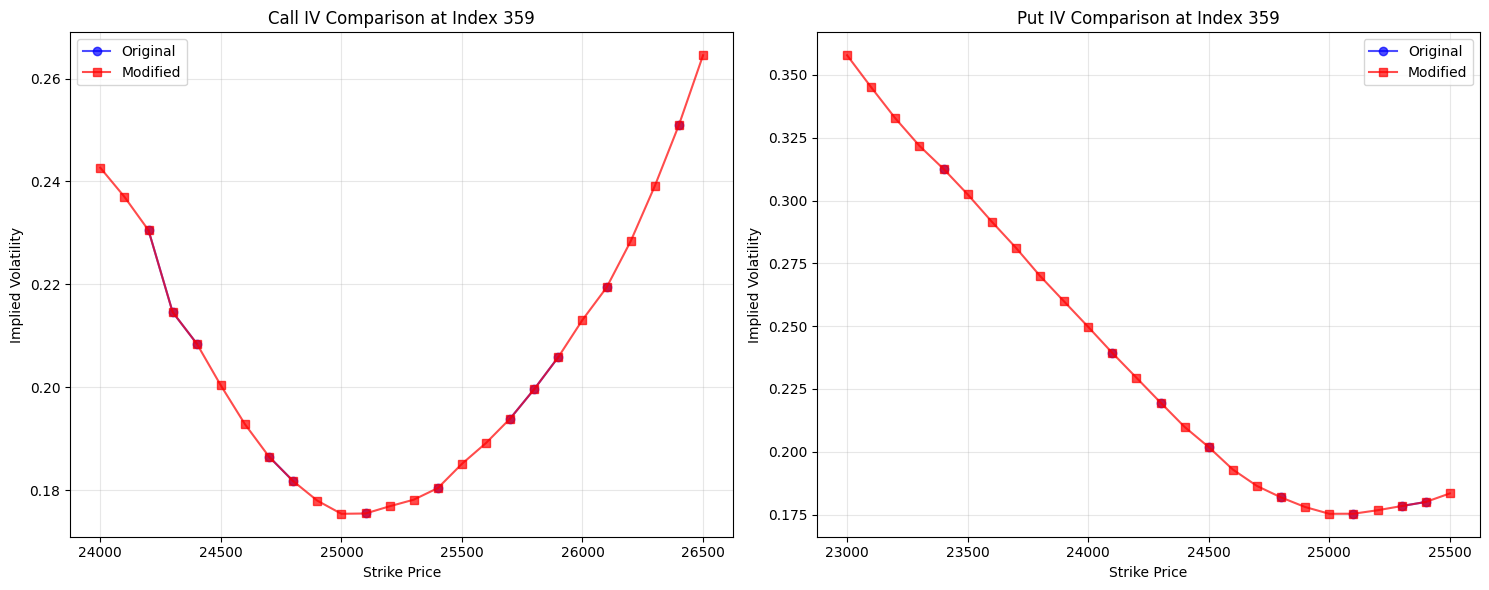

In [373]:
# Load the original test data
test_df_original = pd.read_parquet(f"data/test_data.parquet")

# Select a specific index for comparison
index_to_plot = 359

# Get call and put columns from both dataframes
call_cols_orig = [col for col in test_df_original.columns if col.startswith("call_iv_")]
put_cols_orig = [col for col in test_df_original.columns if col.startswith("put_iv_")]

call_cols_modified = [col for col in test_df.columns if col.startswith("call_iv_")]
put_cols_modified = [col for col in test_df.columns if col.startswith("put_iv_")]

# Extract strike prices
call_strikes = [int(col.split("_")[-1]) for col in call_cols_orig]
put_strikes = [int(col.split("_")[-1]) for col in put_cols_orig]

# Get data for the specific index
call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

call_values_modified = [
    test_df_3[col].iloc[index_to_plot] for col in call_cols_modified
]
put_values_modified = [test_df_3[col].iloc[index_to_plot] for col in put_cols_modified]

# Create comparison plots
plt.figure(figsize=(15, 6))

# Plot call options comparison
plt.subplot(1, 2, 1)
plt.plot(
    call_strikes, call_values_orig, "o-", color="blue", label="Original", alpha=0.7
)
plt.plot(
    call_strikes, call_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
print(call_values_orig)
print(call_values_modified)
plt.title(f"Call IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot put options comparison
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_values_orig, "o-", color="blue", label="Original", alpha=0.7)
plt.plot(
    put_strikes, put_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
plt.title(f"Put IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [365]:
sample_submission = pd.read_csv(f"data/sample_submission.csv")
submission_cols = sample_submission.columns.tolist()

sub = test_df_3[submission_cols]
sub.to_csv("final_day/output/smoothed_pca.csv", index=False)
sub

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.265624,0.255561,0.248099,0.242149,0.236448,0.232439,0.225910,0.222997,...,0.232334,0.226261,0.222046,0.227301,0.234169,0.245099,0.250422,0.261159,0.269401,0.282229
1,1,0.270276,0.268004,0.258893,0.248998,0.241672,0.237125,0.233548,0.228694,0.226526,...,0.233264,0.228209,0.226327,0.231978,0.240749,0.249402,0.257032,0.263543,0.270801,0.281031
2,2,0.258493,0.251731,0.238336,0.226153,0.214869,0.204580,0.194604,0.186914,0.181393,...,0.194612,0.188052,0.181182,0.179246,0.181346,0.185541,0.190750,0.197467,0.204841,0.213141
3,3,0.241888,0.232523,0.220505,0.208775,0.198602,0.186190,0.175032,0.167531,0.162810,...,0.174700,0.166394,0.161561,0.161607,0.164983,0.172032,0.180155,0.188396,0.197762,0.206107
4,4,0.235328,0.230702,0.222983,0.214126,0.206278,0.199892,0.192603,0.186338,0.181374,...,0.193556,0.186460,0.181194,0.177920,0.175226,0.176000,0.177439,0.179236,0.182314,0.185379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.240557,0.233427,0.224970,0.215924,0.206982,0.199287,0.192150,0.186856,0.181943,...,0.192302,0.186161,0.181865,0.177270,0.175160,0.174960,0.176356,0.177716,0.179310,0.181746
12061,12061,0.242669,0.236380,0.226972,0.217272,0.208108,0.200906,0.193655,0.187886,0.184116,...,0.193344,0.187654,0.184075,0.180196,0.177969,0.177923,0.179185,0.180254,0.182143,0.184652
12062,12062,0.256475,0.243817,0.234267,0.221270,0.212242,0.202131,0.192422,0.185088,0.179760,...,0.192306,0.184183,0.179666,0.176916,0.178000,0.182711,0.188666,0.194536,0.201360,0.209940
12063,12063,0.247074,0.239825,0.231375,0.221481,0.212211,0.204159,0.196707,0.190833,0.185851,...,0.196842,0.190933,0.186172,0.182033,0.178754,0.177923,0.178347,0.178806,0.180253,0.182196


In [366]:
sub.isna().sum().sum()

0

In [381]:
from scipy.signal import savgol_filter

smoothed_calls = savgol_filter(
    test_df[call_cols_modified], window_length=5, polyorder=2
)
smoothed_puts = savgol_filter(
    test_df[put_cols_modified], window_length=5, polyorder=2
)
test_df_savgol= test_df.copy()
test_df_savgol[call_cols_modified] = smoothed_calls
test_df_savgol[put_cols_modified] = smoothed_puts

for col in test_pred_cols:
    if col in test_df_orig.columns:
        # Get mask of non-NaN values in original data
        non_nan_mask = ~test_df_orig[col].isna()
        # # Replace corresponding values in test_df_2
        test_df_savgol.loc[non_nan_mask, col] = test_df_orig.loc[non_nan_mask, col]

[nan, nan, 0.230511, 0.214605, 0.208487, nan, nan, 0.18649, 0.181747, nan, nan, 0.175455, nan, nan, 0.180396, nan, nan, 0.193911, 0.199638, 0.205881, nan, 0.219397, nan, nan, 0.250993, nan]
[0.2420096285714283, 0.23424328571428554, 0.230511, 0.214605, 0.208487, 0.20034922857142845, 0.19270777142857132, 0.18649, 0.181747, 0.17783219999999988, 0.17555334285714275, 0.175455, 0.17689337142857134, 0.17816585714285704, 0.180396, 0.1848388857142856, 0.18932728571428561, 0.193911, 0.199638, 0.205881, 0.21298834285714274, 0.219397, 0.22837094285714274, 0.23917711428571414, 0.250993, 0.2634162857142856]


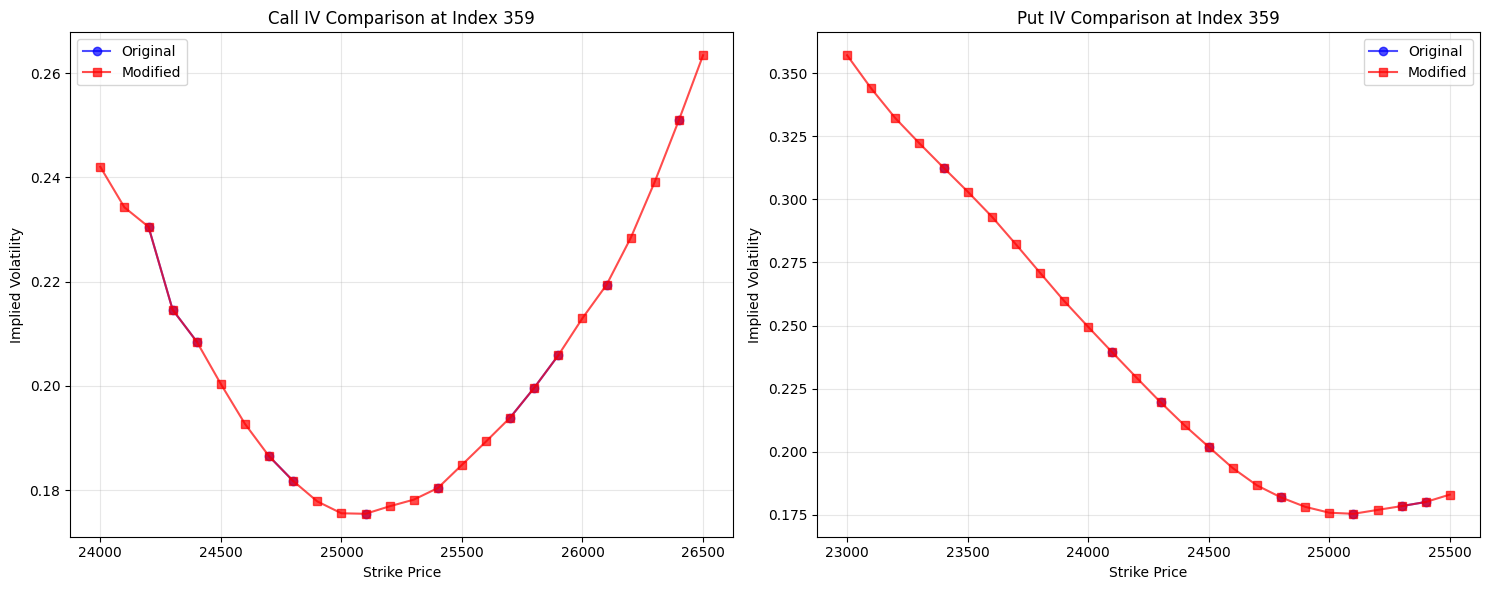

In [383]:
# Load the original test data
test_df_original = pd.read_parquet(f"data/test_data.parquet")

# Select a specific index for comparison
index_to_plot = 359

# Get call and put columns from both dataframes
call_cols_orig = [col for col in test_df_original.columns if col.startswith("call_iv_")]
put_cols_orig = [col for col in test_df_original.columns if col.startswith("put_iv_")]

call_cols_modified = [col for col in test_df.columns if col.startswith("call_iv_")]
put_cols_modified = [col for col in test_df.columns if col.startswith("put_iv_")]

# Extract strike prices
call_strikes = [int(col.split("_")[-1]) for col in call_cols_orig]
put_strikes = [int(col.split("_")[-1]) for col in put_cols_orig]

# Get data for the specific index
call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

call_values_modified = [
    test_df_savgol[col].iloc[index_to_plot] for col in call_cols_modified
]
put_values_modified = [test_df_savgol[col].iloc[index_to_plot] for col in put_cols_modified]

# Create comparison plots
plt.figure(figsize=(15, 6))

# Plot call options comparison
plt.subplot(1, 2, 1)
plt.plot(
    call_strikes, call_values_orig, "o-", color="blue", label="Original", alpha=0.7
)
plt.plot(
    call_strikes, call_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
print(call_values_orig)
print(call_values_modified)
plt.title(f"Call IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot put options comparison
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_values_orig, "o-", color="blue", label="Original", alpha=0.7)
plt.plot(
    put_strikes, put_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
plt.title(f"Put IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [384]:
sample_submission = pd.read_csv(f"data/sample_submission.csv")
submission_cols = sample_submission.columns.tolist()

sub = test_df_savgol[submission_cols]
sub.to_csv("final_day/output/savgol.csv", index=False)
sub

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.261703,0.251835,0.251139,0.242149,0.238177,0.232439,0.226372,0.222997,...,0.232334,0.226025,0.223717,0.227301,0.234169,0.243741,0.250422,0.260697,0.271250,0.282229
1,1,0.270276,0.267392,0.258893,0.249978,0.244150,0.239080,0.233548,0.228081,0.226079,...,0.233959,0.228209,0.226439,0.230388,0.239124,0.249402,0.257826,0.265243,0.273183,0.281251
2,2,0.257849,0.251731,0.237410,0.224546,0.214869,0.204580,0.194604,0.187329,0.182701,...,0.194612,0.188052,0.183244,0.180884,0.181346,0.185238,0.190750,0.197279,0.204181,0.211682
3,3,0.241888,0.231807,0.220505,0.209565,0.198602,0.186190,0.174505,0.165883,0.161194,...,0.174733,0.166394,0.161561,0.160448,0.163860,0.172032,0.185034,0.193072,0.199877,0.206107
4,4,0.235328,0.229625,0.222983,0.214126,0.206515,0.199258,0.192603,0.187139,0.182376,...,0.192857,0.187142,0.181945,0.177920,0.176113,0.176000,0.177397,0.179462,0.182314,0.186211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.243403,0.233427,0.224683,0.215809,0.207159,0.199425,0.192689,0.186856,0.181746,...,0.192791,0.186471,0.181252,0.177270,0.175135,0.174994,0.176356,0.177716,0.179344,0.181561
12061,12061,0.241702,0.236380,0.226972,0.217590,0.209007,0.200906,0.193655,0.187869,0.183341,...,0.193960,0.187587,0.183242,0.180196,0.177969,0.177923,0.178794,0.180254,0.181825,0.183953
12062,12062,0.256475,0.243817,0.234267,0.221270,0.211324,0.201792,0.192578,0.185088,0.179760,...,0.192306,0.184827,0.179666,0.176916,0.177234,0.180796,0.186401,0.193347,0.201360,0.209940
12063,12063,0.249808,0.239825,0.231439,0.221770,0.212413,0.204499,0.197813,0.190833,0.185851,...,0.198010,0.190933,0.186172,0.182006,0.179028,0.177958,0.178287,0.178806,0.180316,0.182309
